# End to End Time Series Forecasting Analysis using ARIMA

In [2]:
#Changing working directory
import os
print(os.getcwd())

import warnings
warnings.filterwarnings('ignore')

D:\01_DATA_SCIENCE_FINAL\D-00000-TIMESERIES\D-TIMESERIES_CODES\Amn_TimeSeies\AMAN-Time Series Analysis


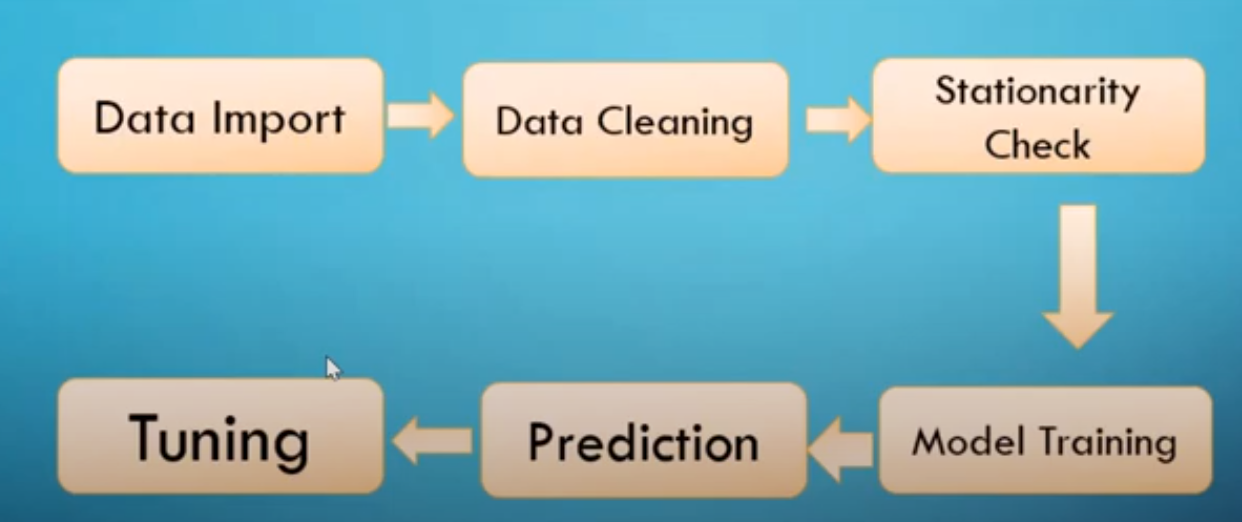

In [3]:
from IPython.display import Image
Image("EndtoEnd-TS-Analysis.PNG")

In [4]:
# Data import and cleaning

In [10]:
# Data and Package import
# Data Source - Kaggle - https://www.kaggle.com/rohanrao/nifty50-stock-market-data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA
TempData = pd.read_csv("DATASET_STOCK_PRICE_LIST_COMPANIES/HCLTECH.csv")
# TempData.tail(30)
TempData.head(30)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.00,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.00,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.00,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.30,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.00,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN
5,2000-01-18,HCLTECH,EQ,1801.65,1730.55,1815.00,1657.55,1775.00,1774.50,1716.39,359900,6.177280e+13,NaN,NaN,NaN
6,2000-01-19,HCLTECH,EQ,1774.50,1815.00,1889.00,1760.00,1842.80,1851.15,1842.81,316050,5.824204e+13,NaN,NaN,NaN
7,2000-01-20,HCLTECH,EQ,1851.15,1865.00,1865.00,1750.00,1753.50,1757.85,1801.37,204700,3.687409e+13,NaN,NaN,NaN
8,2000-01-21,HCLTECH,EQ,1757.85,1761.00,1815.00,1705.00,1786.00,1781.35,1774.01,282150,5.005360e+13,NaN,NaN,NaN
9,2000-01-24,HCLTECH,EQ,1781.35,1834.90,1923.90,1795.00,1923.90,1923.90,1875.34,328650,6.163317e+13,NaN,NaN,NaN


In [11]:
# Data Cleaning
HCLTechStockData = TempData.dropna()

HCLTechStockData.index = pd.to_datetime(HCLTechStockData.Date)

HCLTechStockData = HCLTechStockData["Prev Close"]['2013-01-01':'2013-12-02']
HCLTechStockData.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

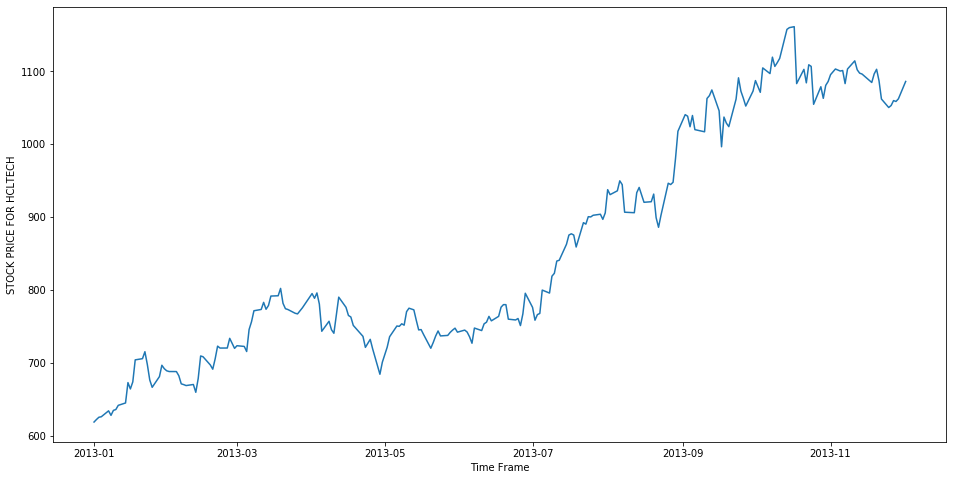

In [12]:
#Data Exploration
plt.figure(figsize=(16,8))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('STOCK PRICE FOR HCLTECH')
ax1.plot(HCLTechStockData)
plt.show()

In [13]:
# Checking Stationarity

In [14]:
# Method 1 - Rolling Statistics
# Method 2 - Duckey fuller

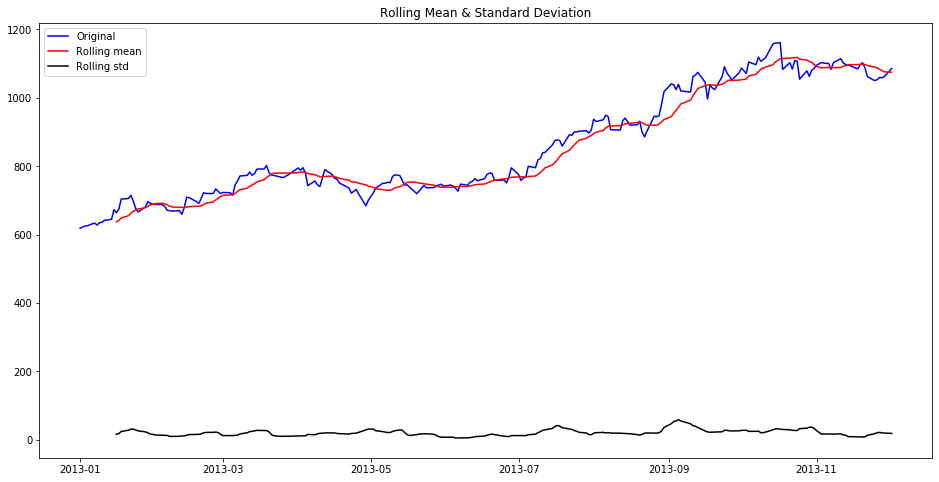

In [18]:
#Determining rolling statistics
rolLmean = HCLTechStockData.rolling(window=12).mean()
rolLstd = HCLTechStockData.rolling(window=12).std()

fig = plt.figure(figsize=(16,8))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(HCLTechStockData, color='blue', label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling mean')
std = plt.plot(rolLstd, color='black', label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

plt.show(block=False)

# Making Series Stationary

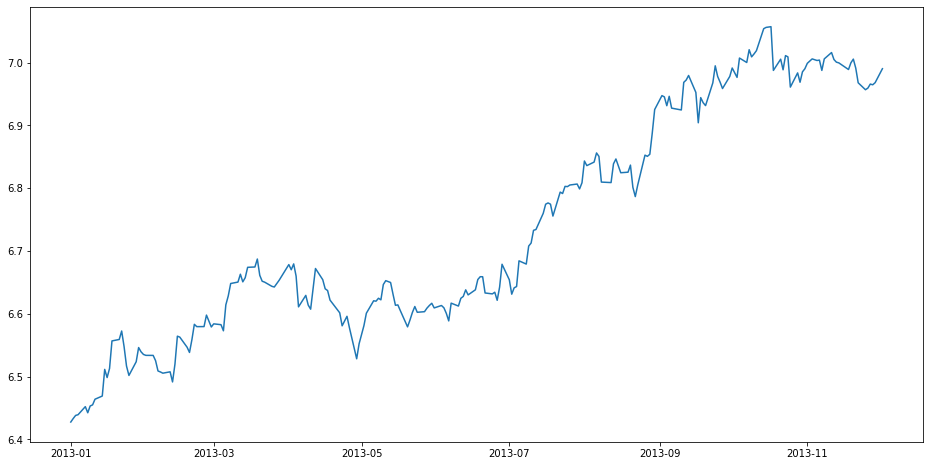

In [21]:
#Lets try transformation
plt.figure(figsize=(16,8))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(HCLTechStockData)
plt.plot(ts_log)

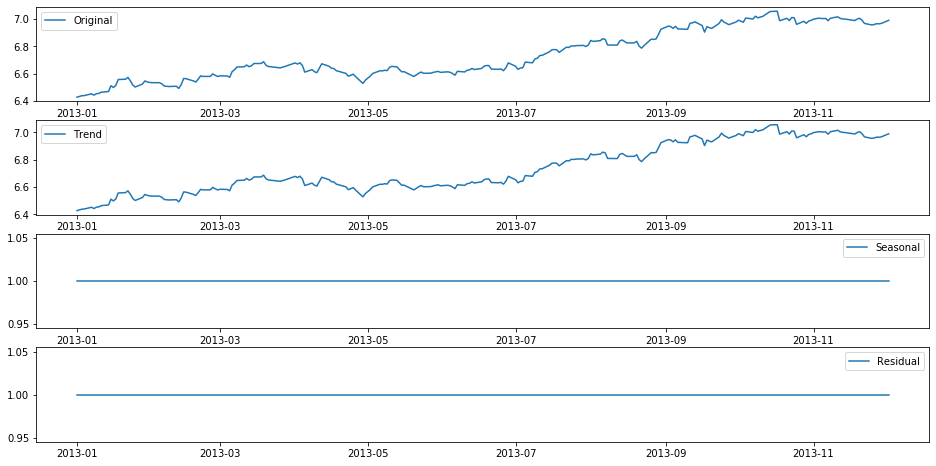

In [22]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=1, model='multuplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,8))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
           
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
           
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.legend(loc='best')
plt.show()

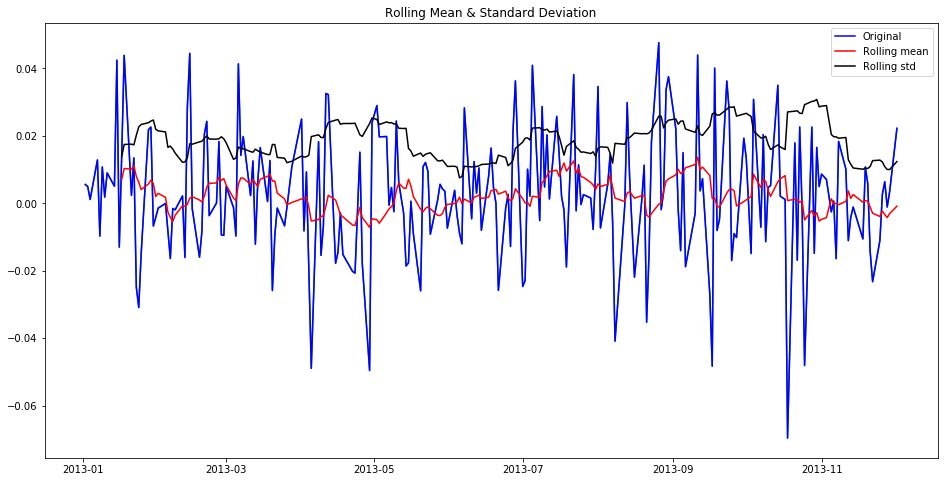

In [23]:
#Lets's try differencing
plt.figure(figsize=(16,8))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determining the rolling statistics
rolLmean = ts_log_diff.rolling(window=12).mean()
rolLstd = ts_log_diff.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue', label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling mean')
std = plt.plot(rolLstd, color='black', label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

plt.show(block=False)

The above plot informs TIMESERIES is STATIONARY

### ADF test (additional test)

In [25]:
ts_log_diff_no_nan = ts_log_diff.dropna()

In [26]:
# ADF test (additional test)
from statsmodels.tsa.stattools import adfuller

# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(ts_log_diff_no_nan, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -11.814335558344528
p-value: 8.709941370941645e-22
Critial Values:
   1%, -3.4594900381360034
Critial Values:
   5%, -2.8743581895178485
Critial Values:
   10%, -2.573601605503697


In [27]:
HCLTechStockData.head()

Date
2013-01-01    618.70
2013-01-02    622.15
2013-01-03    625.25
2013-01-04    625.95
2013-01-07    634.05
Name: Prev Close, dtype: float64

In [28]:
HCLTechStockData.sort_index(inplace=True)

In [29]:
HCLTechStockData.head()

Date
2013-01-01    618.70
2013-01-02    622.15
2013-01-03    625.25
2013-01-04    625.95
2013-01-07    634.05
Name: Prev Close, dtype: float64

In [31]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

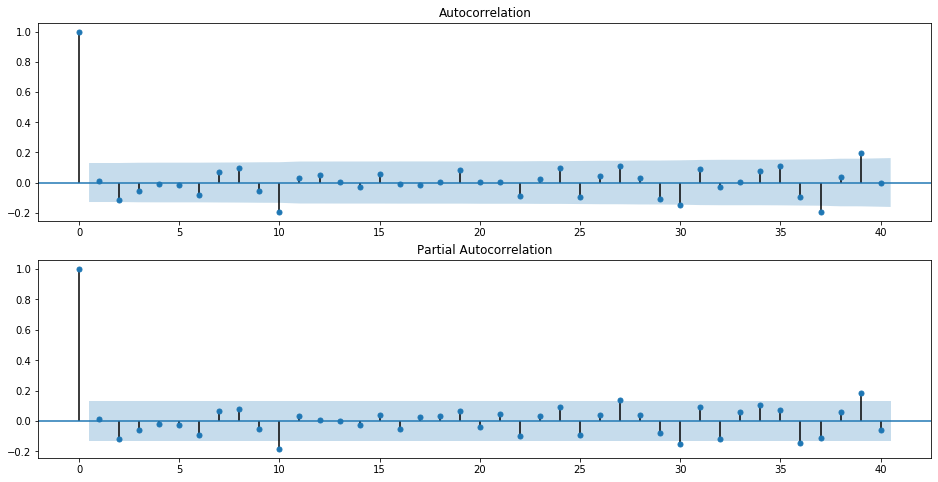

In [34]:
import statsmodels.api as sm
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(), lags=40, ax=ax2)

C:\Users\VK\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\VK\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


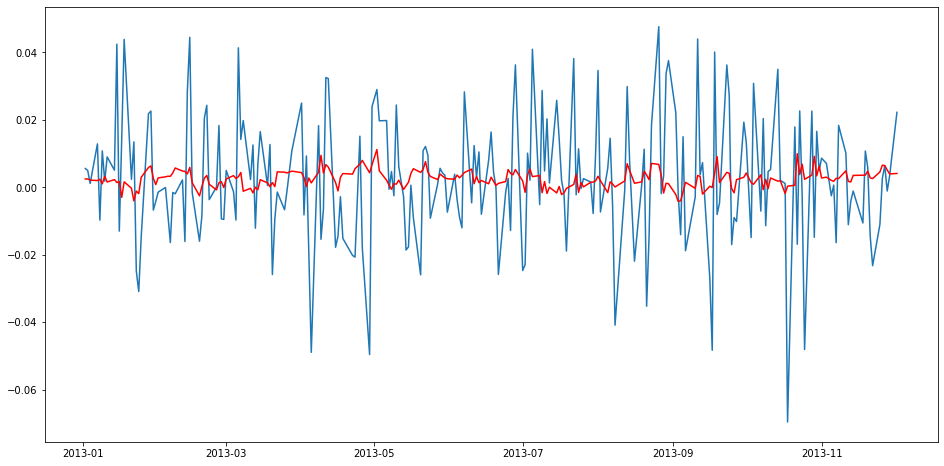

In [43]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize=(16,8))
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit(disp.=1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

# Taking Results back to the original scale

In [44]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2013-01-02    0.002432
2013-01-03    0.002471
2013-01-04    0.002117
2013-01-07    0.001981
2013-01-08    0.002377
dtype: float64


In [45]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2013-01-02    0.002432
2013-01-03    0.004903
2013-01-04    0.007021
2013-01-07    0.009002
2013-01-08    0.011379
dtype: float64


In [46]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum, fill_value=0)
ARIMA_log_prediction.head()

Date
2013-01-01    6.427621
2013-01-02    6.430053
2013-01-03    6.432524
2013-01-04    6.434641
2013-01-07    6.436622
dtype: float64

Text(0.5, 1.0, 'RMSE: 76.7115')

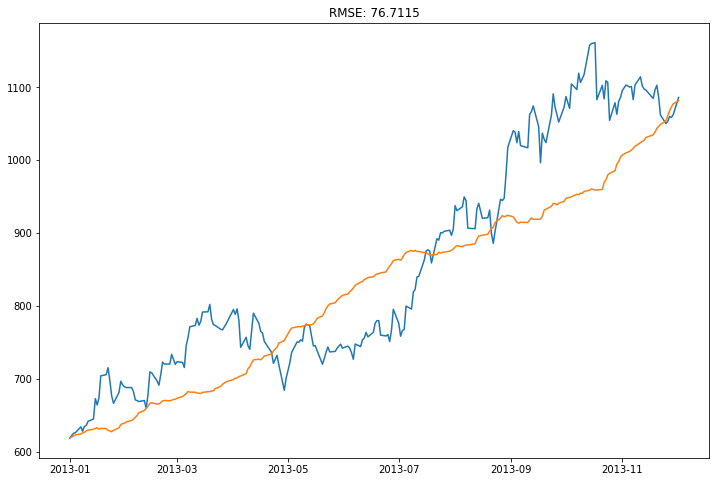

In [48]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(HCLTechStockData)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'%np.sqrt(sum((predictions_ARIMA-HCLTechStockData)**2)/len(HCLTechStockData)))

In [49]:
results_ARIMA.predict(10,20)

Date
2013-01-15    0.001398
2013-01-16    0.001704
2013-01-17   -0.002997
2013-01-18    0.001599
2013-01-21   -0.000306
2013-01-22   -0.004052
2013-01-23   -0.001140
2013-01-24   -0.001885
2013-01-25    0.002912
2013-01-28    0.005861
2013-01-29    0.006330
dtype: float64

In [51]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                             start_p = 3,
                             start_q = 3,
                             max_p = 5,
                             max_q = 5,
                             test = 'adf',
                             seasonal = True,
                             trace = True)
    return automodel

In [52]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1159.052, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1167.424, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1165.456, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1165.465, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1165.525, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1163.485, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.154 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)